In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# generator model
generator = Sequential([
    Dense(256, input_shape=(10,)),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dense(128),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dense(1, activation='linear')
])

# discriminator model
discriminator = Sequential([
    Dense(128, input_shape=(1,)),
    LeakyReLU(alpha=0.2),
    Dense(64),
    LeakyReLU(alpha=0.2),
    Dense(1, activation='sigmoid')
])

discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
discriminator.trainable = False

# Create a GAN by combining the generator and discriminator
gan_input = Input(shape=(10,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0001, 0.5))

# Generate random data for training
data = np.random.normal(0, 1, (1000, 1))

for epoch in range(1000):
    # Train the discriminator
    fake_data = generator.predict(np.random.rand(1000, 10))
    real_labels = np.ones((1000, 1))
    fake_labels = np.zeros((1000, 1))
    discriminator.train_on_batch(data, real_labels)
    discriminator.train_on_batch(fake_data, fake_labels)

    # Train the generator via the GAN
    gan_labels = np.ones((1000, 1))
    gan.train_on_batch(np.random.rand(1000, 10), gan_labels)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}")

# Generate some data samples from the generator
generated_data = generator.predict(np.random.rand(1000, 10))



32/32 [==============================] - 0s 4ms/step
Epoch: 0
32/32 [==============================] - 0s 2ms/step
Epoch: 100
32/32 [==============================] - 0s 2ms/step
Epoch: 200
32/32 [==============================] - 0s 2ms/step
Epoch: 300
32/32 [==============================] - 0s 2ms/step
Epoch: 400
32/32 [==============================] - 0s 3ms/step
Epoch: 500
32/32 [==============================] - 0s 2ms/step
Epoch: 600
32/32 [==============================] - 0s 2ms/step
Epoch: 700
32/32 [==============================] - 0s 2ms/step
Epoch: 800
32/32 [==============================] - 0s 3ms/step
Epoch: 900
32/32 [==============================] - 0s 2ms/step


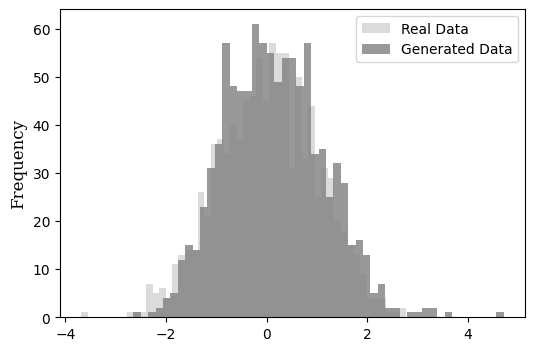

In [ ]:
plt.figure(figsize=(6, 4))

# Plot the real data
plt.hist(data, bins=50, alpha=0.8, color='lightgray', label='Real Data')

# Plot the generated data
plt.hist(generated_data, bins=50, alpha=0.8, color='gray', label='Generated Data')

plt.legend()

csfont = {'fontname': 'serif'}
plt.ylabel('Frequency', fontsize=12, **csfont)

plt.savefig('gan_hist.pdf')
plt.show()